In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Gold Price (1).csv to Gold Price (1).csv


In [3]:
 encoding='ISO-8859-1'

df=pd.read_csv('Gold Price.csv')

In [6]:
df = pd.read_csv('Gold Price (1).csv')

In [7]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95


In [8]:
df.shape

(2848, 7)

In [9]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2848 non-null   object 
 1   Price   2848 non-null   int64  
 2   Open    2848 non-null   int64  
 3   High    2848 non-null   int64  
 4   Low     2848 non-null   int64  
 5   Volume  2848 non-null   int64  
 6   Chg%    2848 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 155.9+ KB


*Handling Duplicate values*

In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2843,False
2844,False
2845,False
2846,False


*Summary statistics for numerical columns*

In [12]:
df.describe()

,Price,Open,High,Low,Volume,Chg%
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,41221.788624,41223.038975,41443.228230,41002.117275,12592.610253,0.037324
std,14374.500657,14375.130049,14451.199655,14300.609162,10643.504531,0.829900
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,29168.750000,29154.000000,29294.500000,29002.000000,6307.500000,-0.380000
50%,33939.000000,33945.000000,34229.500000,33743.000000,10830.000000,0.040000
75%,50824.000000,50819.000000,51071.000000,50551.000000,16472.500000,0.460000
max,79257.000000,79264.000000,79999.000000,78888.000000,106920.000000,5.300000


*Handling Missing values*

In [13]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


In [14]:
df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


In [15]:
print(df.describe())

              Price          Open          High           Low         Volume  \
count   2848.000000   2848.000000   2848.000000   2848.000000    2848.000000   
mean   41221.788624  41223.038975  41443.228230  41002.117275   12592.610253   
std    14374.500657  14375.130049  14451.199655  14300.609162   10643.504531   
min    24545.000000  24583.000000  24635.000000  24470.000000       0.000000   
25%    29168.750000  29154.000000  29294.500000  29002.000000    6307.500000   
50%    33939.000000  33945.000000  34229.500000  33743.000000   10830.000000   
75%    50824.000000  50819.000000  51071.000000  50551.000000   16472.500000   
max    79257.000000  79264.000000  79999.000000  78888.000000  106920.000000   

              Chg%  
count  2848.000000  
mean      0.037324  
std       0.829900  
min      -5.980000  
25%      -0.380000  
50%       0.040000  
75%       0.460000  
max       5.300000  


In [16]:
print(df['Volume'].value_counts())

Volume
0        20
190      19
60       16
70       15
110      14
         ..
39540     1
48630     1
53540     1
31610     1
43930     1
Name: count, Length: 1653, dtype: int64


In [17]:
print(df['Chg%'].value_counts())

Chg%
 0.00    29
 0.11    25
 0.21    25
 0.07    25
 0.09    24
         ..
-5.98     1
 3.94     1
-2.89     1
 4.63     1
-1.64     1
Name: count, Length: 427, dtype: int64


In [18]:
print(df['Open'].value_counts())

Open
29700    6
29750    5
47200    5
47800    5
31000    5
        ..
48911    1
48882    1
48767    1
48321    1
48205    1
Name: count, Length: 2495, dtype: int64


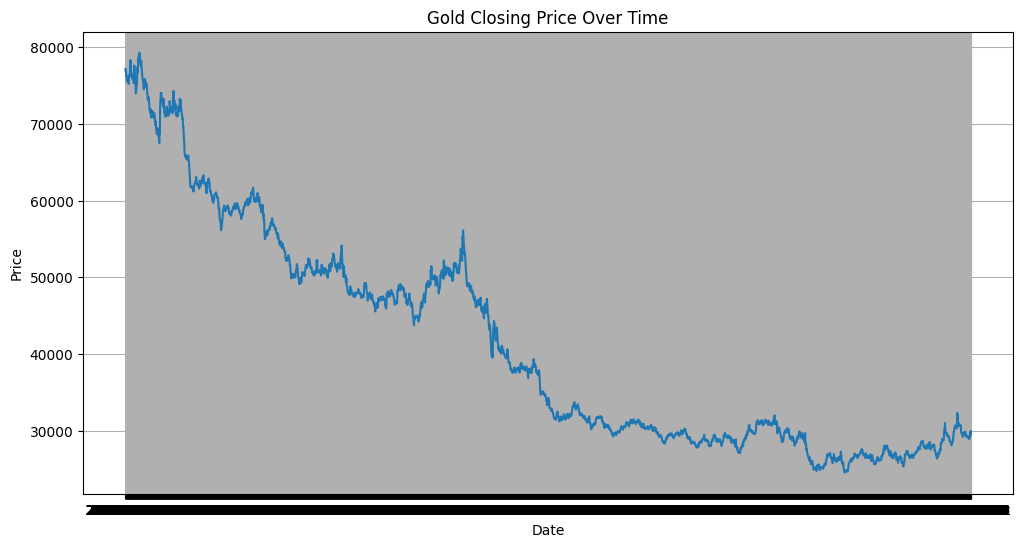

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

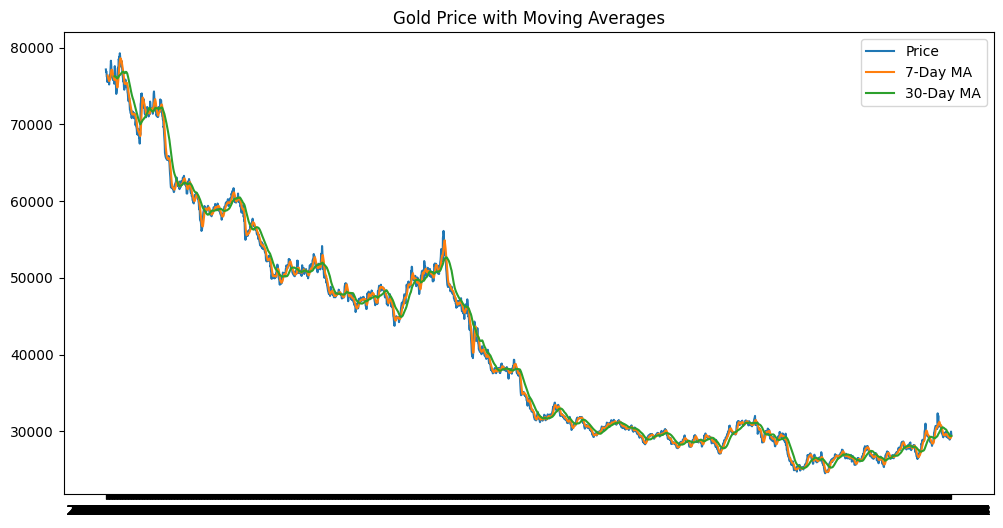

In [21]:
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA30'] = df['Price'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['MA7'], label='7-Day MA')
plt.plot(df['Date'], df['MA30'], label='30-Day MA')
plt.legend()
plt.title('Gold Price with Moving Averages')
plt.show()

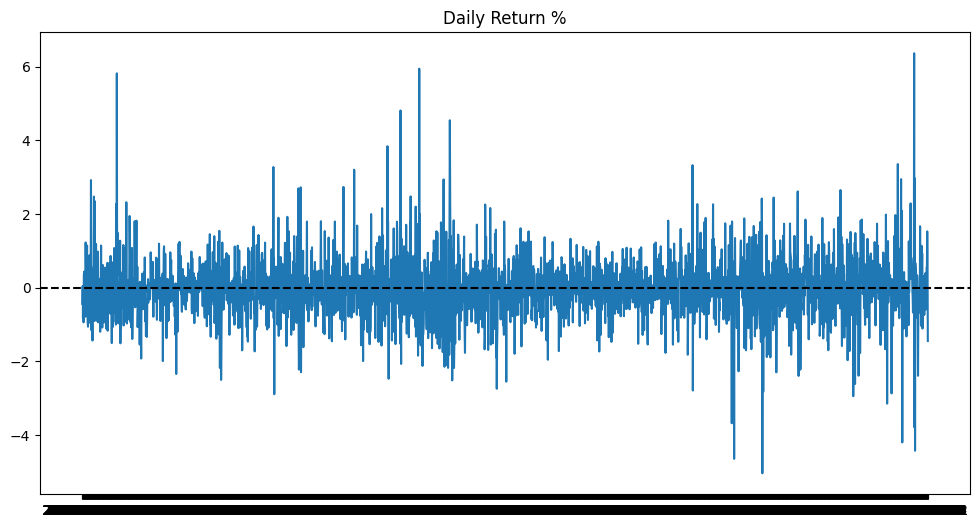

In [22]:
df['Daily Return (%)'] = df['Price'].pct_change() * 100
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Daily Return (%)'], label='Daily Return (%)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Daily Return %')
plt.show()

           Price      Open      High       Low    Volume
Price   1.000000  0.999721  0.999840  0.999889  0.037423
Open    0.999721  1.000000  0.999848  0.999824  0.038205
High    0.999840  0.999848  1.000000  0.999759  0.041644
Low     0.999889  0.999824  0.999759  1.000000  0.033222
Volume  0.037423  0.038205  0.041644  0.033222  1.000000


<Axes: >

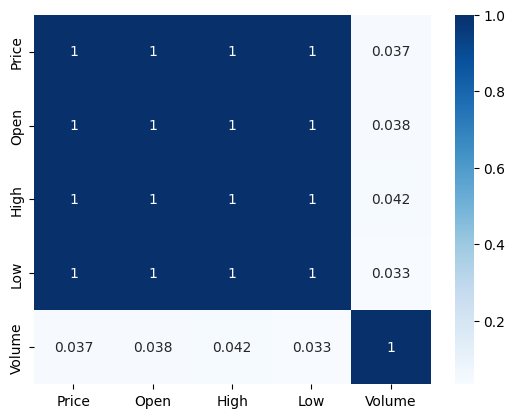

In [23]:
correlation = df[['Price', 'Open', 'High', 'Low', 'Volume']].corr()
print(correlation)
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='Blues')

In [24]:
df.to_csv("Processed_Gold_Data.csv")